<a href="https://colab.research.google.com/github/SamHarris2020/Fun-Stuff/blob/master/Audio_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The First Time You Ever Use This Program, Run The Following This Block, It Will Take A Few Minutes, But Afterwards Everything Will Be Setup

In [0]:

# Run This Once To Install All The Dependencies And Download The Instrument Soundfonts
from IPython.display import clear_output

!pip install midiutil
!pip install midi2audio 
!pip install IPython
!sudo apt-get install fluidsynth

# Download Piano & Guitar Soundfonts
!wget https://www.dropbox.com/s/hj0u4z8ynsj6vns/Electric-Guitars-JNv4.4.sf2?dl=0
!wget https://www.dropbox.com/s/3dwh40ds5f4jdij/Rhodes%20EPs%20Plus-JN1.5.sf2?dl=0

# Rename Them To Something Useful
!mv 'Electric-Guitars-JNv4.4.sf2?dl=0' guitar.sf2
!mv 'Rhodes EPs Plus-JN1.5.sf2?dl=0' piano.sf2

# Download and Rename Reference Sheet
!wget https://www.dropbox.com/s/fhxbr47th83uvrb/chart.png?dl=0
!mv chart.png?dl=0 chart.png

clear_output()

#Run This Block Every Time You Open Google Collab To Load Your Saved Instruments And Songs

In [0]:
# Modified From: https://stackoverflow.com/questions/47194063/persisting-data-in-google-colaboratory 

import os
import dill
from google.colab import drive

# Some Important Vars
backup_dir = 'drive/My Drive/colab_sessions'
backup_file = 'notebook_env.db'
backup_path = backup_dir + '/' + backup_file

class saver:

  def init_drive(self):
    # create directory if not exist
    drive.mount('drive', force_remount=True)
    if not os.path.exists(backup_dir):
      os.makedirs(backup_dir, exist_ok=True)

  def save_session(self):
    self.init_drive()
    dill.dump_session(backup_path)

  def load_session(self):
    self.init_drive()
    dill.load_session(backup_path)

# Load Your Previous Session 
saver().load_session()

Run This Every Time Before Closing Google Collab 
# This Saves Your Files

In [0]:
saver().save_session()

Mounted at drive


#The Main Driver Code, For the Most Part, Ignore This Block 

In [0]:
""""
Piano Letter Note To Midi File Converter
Sam Harris - 12/01/2019

License:
This code can be freely copied, modified, altered, distributed without any attribution whatsoever.
However, if you feel like it deserves an attribution, mention it. It won't hurt anybody
"""

import os
from midiutil import MIDIFile
from midi2audio import FluidSynth
from IPython.display import Audio

class songWriter:

  """ 
  Params:
  notes: a list of midi note numbers (List)
  bpm: the number of beats per min to play (Number)
  duration: how long should each note last, measured in beats (Number)
  name: what the file is saved as
  """
  def create_track(self, notes, bpm, duration, name):
      time = 0 # Create the time variable that gets incremented as the song is written
      MyMIDI = MIDIFile(1) # midiUtil object (read docs for more info)

      volume = 127

      # Add a track to the midi file, you can add more but I wouldn't recomend it
      MyMIDI.addTempo(track=0, time=time, tempo=bpm)

      # Add each note to the song while incrementing time
      for note in notes:
        if note == 0:
          MyMIDI.addNote(track=0, channel=0, pitch=note, time=time, duration=duration, volume=0)
        else:
          MyMIDI.addNote(track=0, channel=0, pitch=note, time=time, duration=duration, volume=volume)
        time = time + 1
      
      # Save The song as name.mid
      with open("{}.mid".format(name), "wb") as output_file:
        MyMIDI.writeFile(output_file)

# Lists All Songs and Valid Instruments You Have And Based On User Input, Generates
# A Wav Audio File That is Played In The "Run This To Play Your Song" Codeblock  
def list_and_play():
    
  # First, remove any old temporary files
  if os.path.exists('output.wav'):
    os.remove('output.wav')


  song_list = [f for f in os.listdir('.') if os.path.isfile(f) and f.split('.')[1] == "mid" ]

  for i in range(len(song_list)):
    print(i, song_list[i].split(".")[0])

  # Selection system that only allows in range values 
  choice = None

  while choice is None:
    user_input = int(input("Select a Song: "))
    choice = user_input if user_input > -1 and user_input < len(song_list) else None

  # at this point, now that we have a selection, which was selected from the curernt and local 
  # directory of this virtual machine, we just use a second library to play the file
  selection = song_list[choice]

  # Now we can select the instrument
  instrument_list = [f for f in os.listdir('.') if os.path.isfile(f) and f.split('.')[1] == "sf2" ]

  for i in range(len(instrument_list)):
    print(i, instrument_list[i].split(".")[0])

  instrument_choice = None
  
  while instrument_choice is None:
    user_input_2 = int(input("Select an Instrument: "))
    instrument_choice = user_input_2 if user_input_2 > -1 and user_input_2 < len(instrument_list) else None

  # Initialize The Converter With The Soundfont And Then Save It As Output.wav
  # This OverWrites Everytime, Which is Ok as The Original Midi Stays In The 
  # File System, For Further Use
  fs = FluidSynth(instrument_list[instrument_choice])
  fs.midi_to_audio(selection, 'output.wav')
  

# Write Your Song Here

In [0]:
# Example Of Everything In Action
writer = songWriter() # Initialize The songWritter class

# Transcribe Your Song Into MIDI Notation, 0 Is Used As A Rest
notes = [65, 67, 69, 67, 0, 69, 70, 69, 67, 65, 67, 69, 60, 60, 0, 60, 60]

# Then You Call Create Track, With Your Song Name
# WARNING: Using The Same Song Name WILL OVERWRITE previous versions of That Song
# This (^) Will  Useful When Writting A Song and Frequently Testing It 
name = "the lion sleeps tonight"
writer.create_track(notes=notes, bpm=160, duration=1, name=name)

#Run This to Choose and Play a Song

In [0]:
list_and_play()
Audio(data='output.wav', autoplay=True)

Reference Chart For Ease of Songwritting

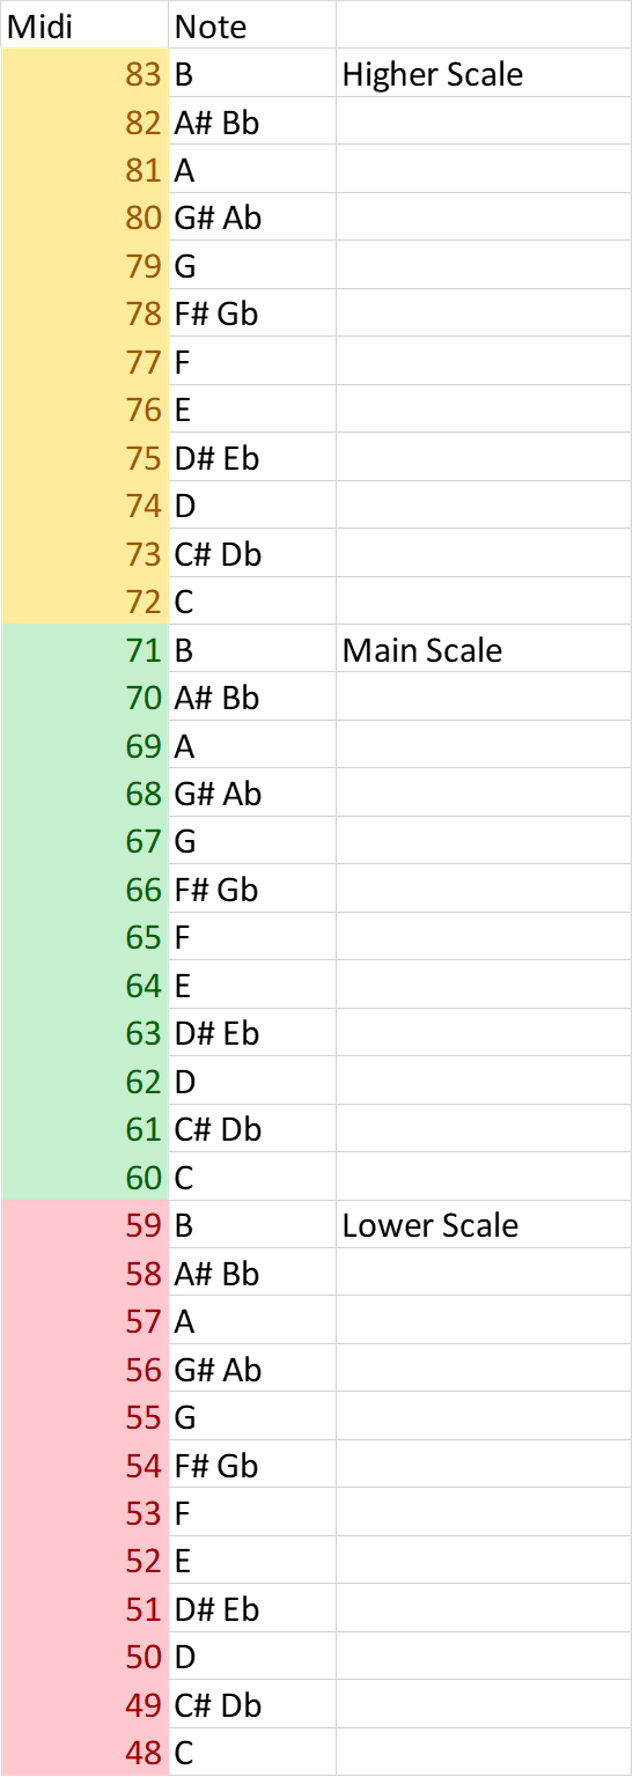

In [0]:
# Display The Midi To Note Chart, Includes 3 Scales
# Downloadable From: https://www.dropbox.com/s/fhxbr47th83uvrb/chart.png?dl=0  
# Chart Made Based Off Of: https://www.inspiredacoustics.com/en/MIDI_note_numbers_and_center_frequencies
from IPython.display import Image
Image('chart.png')